In [24]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import joblib

**Data Preparation and Data Augmentation**

In [2]:
# Step 1: Data Preparation
dataset_path = './PlantVillage'
class_names = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]
data = []
labels = []

In [4]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((256, 256))
    image = np.array(image)
    return image

In [5]:
# Load and augment the dataset
for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = load_and_preprocess_image(image_path)
        
        # Augmentation: Randomly flip the image horizontally
        if np.random.rand() > 0.5:
            image = np.fliplr(image)
        
        data.append(image)
        labels.append(class_index)

data = np.array(data)
labels = np.array(labels)

**Split the Data**

In [8]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

**Data Visualization before train the model**

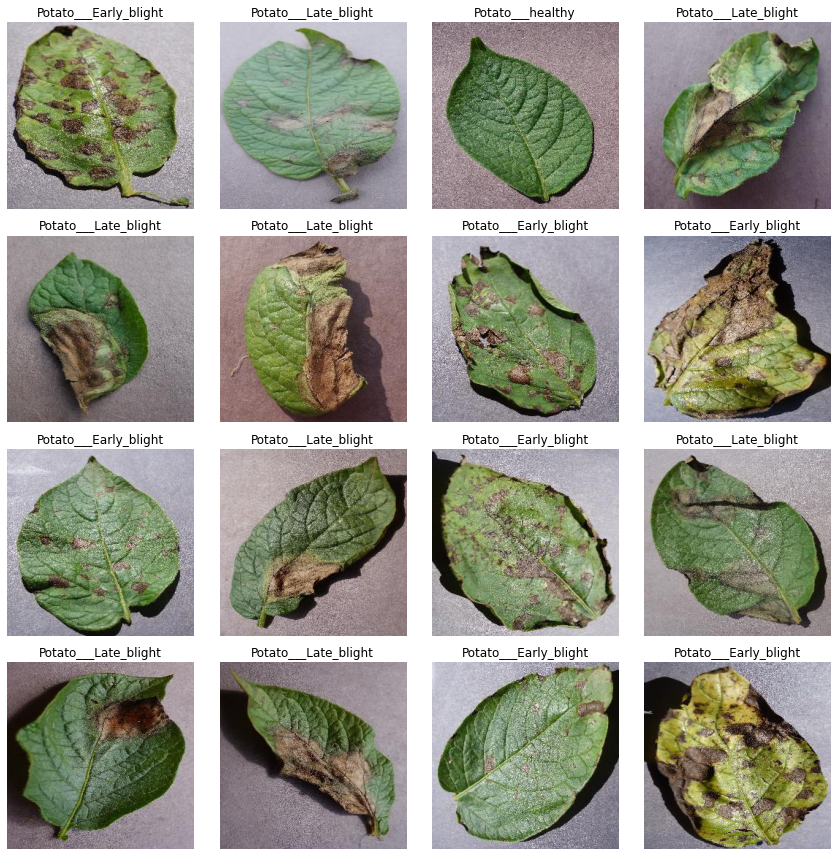

In [15]:
# Train data
plt.figure(figsize=(12, 12))
for i in range(min(len(X_train), 16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

**Train the Decision Trees Classifier Model**

In [18]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
model = DecisionTreeClassifier(random_state=42)

In [19]:
model.fit(X_train_flatten, y_train)

DecisionTreeClassifier(random_state=42)

**Evaluate the Model**

In [21]:
# Data Visualization (After Training)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
y_pred = model.predict(X_test_flatten)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=class_names))

Test Accuracy: 72.39%
                       precision    recall  f1-score   support

Potato___Early_blight       0.78      0.76      0.77       196
     Potato___healthy       0.21      0.19      0.20        26
 Potato___Late_blight       0.73      0.76      0.74       209

             accuracy                           0.72       431
            macro avg       0.57      0.57      0.57       431
         weighted avg       0.72      0.72      0.72       431



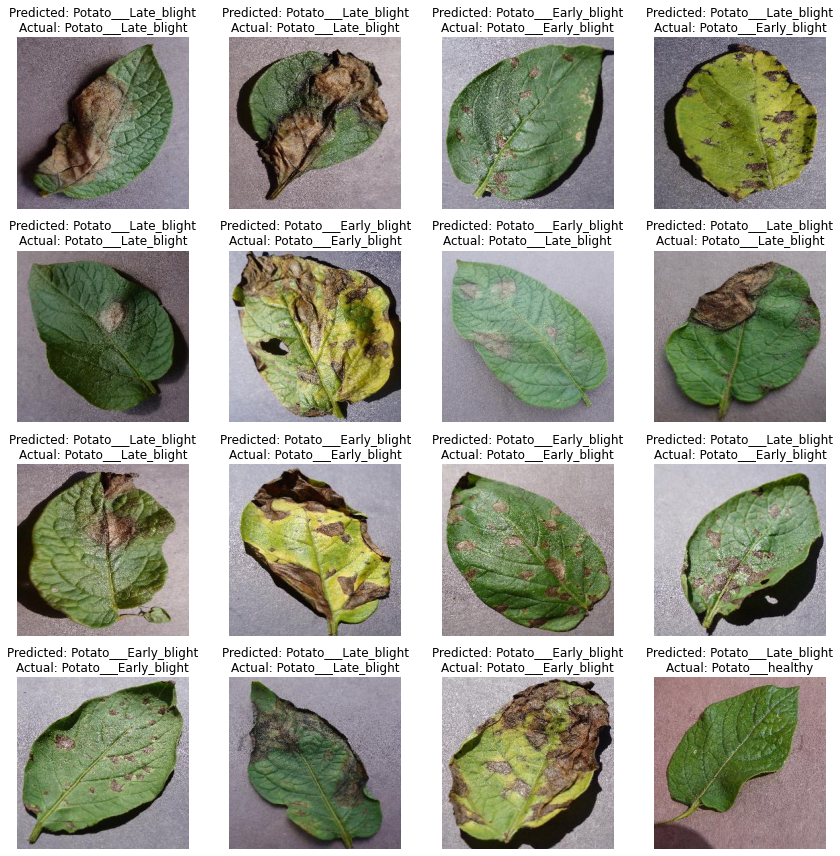

In [22]:
# Visualize some predictions on the test set
plt.figure(figsize=(12, 12))
for i in range(min(len(X_test), 16)):  # Display up to 16 test predictions
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[y_pred[i]]}\nActual: {class_names[y_test[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Save the trained Decision Tree model
model_filename = "potatoDiseaseDT_model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as potatoDiseaseDT_model.pkl


**Make Predictions** Run the code from here

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import joblib

In [ ]:
loaded_model = joblib.load("../Models/potatoDiseaseDT_model.pkl")

In [ ]:
# Define your class names
class_names = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]

In [38]:
# Make Predictions on New Images
new_image_path = './PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG'  # Replace with the path to your new image
new_image = Image.open(new_image_path)
new_image = new_image.resize((256, 256))
new_image_array = np.array(new_image)
predicted_class = model.predict(new_image_array.reshape(1, -1))[0]
predicted_class_name = class_names[predicted_class]

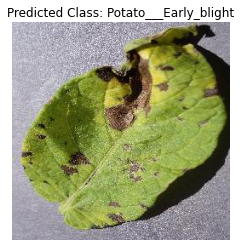

In [40]:
# Display the image and predicted class
plt.imshow(new_image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()